In [21]:
from selenium.webdriver.common.by import By
from urllib3.util.retry import Retry
from requests.adapters import HTTPAdapter
from openpyxl import Workbook
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
import time
import datetime
import requests
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# url
url = 'https://m.place.naver.com/restaurant/1085956231/review/visitor?entry=ple&reviewSort=recent'

# Webdriver headless mode setting
options = Options()
options.add_argument('headless')
options.add_argument('window-size=1920x1080')
options.add_argument("disable-gpu")

# BS4 setting for secondary access
session = requests.Session()
headers = {
    "User-Agent": "user value"}

retries = Retry(total=5,
                backoff_factor=0.1,
                status_forcelist=[500, 502, 503, 504])

session.mount('http://', HTTPAdapter(max_retries=retries))

# New xlsx file
now = datetime.datetime.now()
xlsx = Workbook()
list_sheet = xlsx.create_sheet('output')
list_sheet.append(['nickname', 'content', 'date'])

In [22]:
url = 'https://m.place.naver.com/restaurant/1085956231/review/visitor?entry=ple&reviewSort=recent'

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()

# Webdriver headless mode setting

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
res = driver.get(url)

FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [19]:
driver.page_source

'<html><head><title>429 Too Many Requests</title></head>\n<body bgcolor="white">\n<center><h1>429 Too Many Requests</h1></center>\n<hr><center>nginx/1.14.2</center>\n\n\n\n\n\n\n\n\n</body></html>'

In [11]:


# Start crawling/scraping!

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
res = driver.get(url)
driver.implicitly_wait(30)

# Pagedown
driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)

try:
    for i in range(5):
        driver.find_element(By.XPATH, '//*[@id="app-root"]/div/div/div/div[6]/div[2]/div[3]/div[2]/div/a').click()
        time.sleep(0.4)
except Exception as e:
    print('finish')

time.sleep(5)
html = driver.page_source
bs = BeautifulSoup(html, 'lxml')
reviews = bs.select('li.owAeM')

for r in reviews:
    nickname = r.select_one('div.qgLL3')
    content = r.select_one('div.vg7Fp')
    date = r.select('div.D40bm>span.CKUdu>span.place_blind')[1]

    # exception handling
    nickname = nickname.text if nickname else ''
    content = content.text if content else ''
    date = date.text if date else ''

    time.sleep(0.06)

    print(nickname, '/', content, '/', date)
    list_sheet.append([nickname, content, date])
    time.sleep(0.06)
# Save the file
file_name = 'naver_review_' + now.strftime('%Y-%m-%d_%H-%M-%S') + '.xlsx'
xlsx.save(file_name)



finish


In [12]:
driver.page_source

'<html><head><title>429 Too Many Requests</title></head>\n<body bgcolor="white">\n<center><h1>429 Too Many Requests</h1></center>\n<hr><center>nginx/1.14.2</center>\n\n\n\n\n\n\n\n\n</body></html>'

In [4]:
len(reviews)

50

In [1]:
restaurant_name = "먹돌 제주"

In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

def search_restaurant(restaurant_name):
    base_url = "https://pcmap.place.naver.com/place/list?query="
    search_url = f"{base_url}{restaurant_name}"

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)


    driver.get(search_url)
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "li"))
    )
    # Extract the required data
    restaurants = []
    li_tags = driver.find_elements(By.TAG_NAME, "li")

    for li in li_tags:
        place_bluelink = li.find_element(By.CLASS_NAME, 'place_bluelink')
        name_tag = place_bluelink.find_element(By.TAG_NAME, 'span')
        restaurant_name = name_tag.text.strip()
        href_tag = li.find_element(By.TAG_NAME, 'a')
    
        restaurant_url = href_tag.get_attribute('href')
        restaurants.append((restaurant_name, restaurant_url))
    
    return restaurants


In [19]:
restaurants = search_restaurant(restaurant_name)
for name, url in restaurants:
    print(f"Restaurant Name: {name}, URL: {url}")

Restaurant Name: 먹돌 제주본점, URL: https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#
Restaurant Name: 먹돌새기, URL: https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#
Restaurant Name: 먹돌, URL: https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#
Restaurant Name: 먹돌새기교차로, URL: https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#
Restaurant Name: 먹돌새기, URL: https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#
Restaurant Name: J J아로마스킨&바디, URL: https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#


In [35]:
import chromedriver_autoinstaller
import subprocess

def make_chrome_driver():

    option = Options()
    option.add_experimental_option("debuggerAddress", "127.0.0.1:9222")
    caps = DesiredCapabilities().CHROME
    caps["pageLoadStrategy"] = "eager"
    chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
    try:
        driver = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe', options=option,desired_capabilities=caps)
    except:
        chromedriver_autoinstaller.install(True)
        driver = webdriver.Chrome(f'./{chrome_ver}/chromedriver.exe', options=option,desired_capabilities=caps)
    driver.implicitly_wait(10)
    return driver

proc = subprocess.Popen(
    r'C:\Program Files\Google\Chrome\Application\chrome.exe --remote-debugging-port=9222 --user-data-dir="C:\chrometemp"')  # 디버거 크롬 구동
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service,options=options)
driver.get(search_url)

'<html lang="ko"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta property="og:type" content="website"><meta name="referrer" content="always"><title>먹돌 제주 검색 - 네이버 지도</title><meta data-rh="true" name="Description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="og:description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="twitter:description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="og:image" content="https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fstatic%2Fmaps%2Fv5%2Fpc%2Fnaver-map.png&amp;type=f&amp;size=1200x630&amp;quality=80&amp;opt=2"><meta data-rh="true" property="twitter:image" content="https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fstatic%2Fmaps%2Fv5%2Fpc%2F
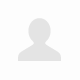
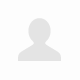

In [36]:
driver.page_source

In [121]:
base_url = "https://pcmap.place.naver.com/place/list?query="
search_url = f"{base_url}{restaurant_name}"

In [27]:
import undetected_chromedriver as uc
options = Options()
options.add_argument("--headless")
driver = uc.Chrome(options=options)

could not detect version_main.therefore, we are assuming it is chrome 108 or higher


In [28]:
driver.get(search_url)

In [20]:
base_url = "https://map.naver.com/p/search/"
search_url = f"{base_url}{restaurant_name}"
options = Options()
options.add_argument("--headless")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)
driver.get(search_url)

'<html lang="ko"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta property="og:type" content="website"><meta name="referrer" content="always"><title>먹돌 제주 검색 - 네이버 지도</title><meta data-rh="true" name="Description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="og:description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="twitter:description" content="공간을 검색합니다. 생활을 연결합니다. 장소, 버스, 지하철, 도로 등 모든 공간의 정보를 하나의 검색으로 연결한 새로운 지도를 만나보세요."><meta data-rh="true" property="og:image" content="https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fstatic%2Fmaps%2Fv5%2Fpc%2Fnaver-map.png&amp;type=f&amp;size=1200x630&amp;quality=80&amp;opt=2"><meta data-rh="true" property="twitter:image" content="https://search.pstatic.net/common/?src=https%3A%2F%2Fssl.pstatic.net%2Fstatic%2Fmaps%2Fv5%2Fpc%2F
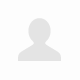
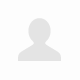

In [23]:
driver.page_source

In [37]:
frame = driver.find_element(By.CSS_SELECTOR, "#searchIframe")
driver.switch_to.frame(frame)

In [38]:
driver.page_source

'<html><head><title>429 Too Many Requests</title></head>\n<body bgcolor="white">\n<center><h1>429 Too Many Requests</h1></center>\n<hr><center>nginx/1.14.2</center>\n\n\n\n\n\n\n\n\n</body></html>'

In [17]:
base_url = "https://map.naver.com/p/search/"
search_url = f"{base_url}{restaurant_name}"

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.get(search_url)
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, "#searchIframe"))
)
frame = driver.find_element(By.CSS_SELECTOR, "#searchIframe")
driver.switch_to.frame(frame)
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.TAG_NAME, "li"))
)

# Extract the required data
restaurants = []
li_tags = driver.find_elements(By.TAG_NAME, "li")

In [11]:
li_tags[0].find_elements(By.CLASS_NAME, 'place_bluelink')[0].click()

In [12]:
time.sleep(1)
current_url = driver.current_url
print("Current URL:", current_url)

Current URL: https://map.naver.com/p/search/%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC/place/1131737857?c=15.00,0,0,0,dh&placePath=%3Fentry%253Dbmp


In [13]:
li_tags[1].find_elements(By.CLASS_NAME, 'place_bluelink')[0].click()

In [14]:
time.sleep(1)
current_url = driver.current_url
print("Current URL:", current_url)

Current URL: https://map.naver.com/p/search/%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC/place/16899024?c=15.00,0,0,0,dh&placePath=%3Fentry%253Dbmp


In [15]:
import re
def extract_number_from_pattern(text):
    # Define the regex pattern to match /place/{number}
    pattern = r'/place/(\d+)'
    
    # Search for the pattern in the given text
    match = re.search(pattern, text)
    
    # Check if the pattern was found
    if match:
        # Extract and return the number
        return int(match.group(1))
    else:
        # If no match found, return None
        return None

In [16]:
number = extract_number_from_pattern(current_url)
number

16899024

In [83]:
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

caps = DesiredCapabilities.CHROME
caps['pageLoadStrategy'] = "normal"  # can also try using "eager" or "none"


In [115]:
base_url = "https://pcmap.place.naver.com/place/list?query="
search_url = f"{base_url}{restaurant_name}"

# Set up headless Chrome browser
options = Options()
options.add_argument("--headless")
options.add_argument("--window-size=1920x1080")  # Typical desktop window size
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36")
options.add_argument("--disable-blink-features=AutomationControlled")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

In [136]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

In [137]:
driver.get(search_url)

In [117]:
html_source = driver.page_source
html_source

'<html><head><title>429 Too Many Requests</title></head>\n<body bgcolor="white">\n<center><h1>429 Too Many Requests</h1></center>\n<hr><center>nginx/1.14.2</center>\n\n\n\n\n\n\n\n\n</body></html>'

In [ ]:
driver.get(search_url)

In [103]:
driver.get(search_url)
driver.execute_script("return document.readyState")
driver.save_screenshot("debug_screenshot.png")  # Save screenshot to file
html_source = driver.page_source


In [104]:
html_source

'<html><head><title>429 Too Many Requests</title></head>\n<body bgcolor="white">\n<center><h1>429 Too Many Requests</h1></center>\n<hr><center>nginx/1.14.2</center>\n\n\n\n\n\n\n\n\n</body></html>'

In [88]:
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.TAG_NAME, "li"))
)

TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00468923+23283]
	(No symbol) [0x0042E934]
	(No symbol) [0x00360733]
	(No symbol) [0x003A326F]
	(No symbol) [0x003A34AB]
	(No symbol) [0x003DEE42]
	(No symbol) [0x003C4464]
	(No symbol) [0x003DCB8D]
	(No symbol) [0x003C41B6]
	(No symbol) [0x00398017]
	(No symbol) [0x0039890D]
	GetHandleVerifier [0x0055A5F3+1013699]
	GetHandleVerifier [0x00563E4C+1052700]
	GetHandleVerifier [0x0055D4B4+1025668]
	GetHandleVerifier [0x0048EA2B+179195]
	(No symbol) [0x00436833]
	(No symbol) [0x00433198]
	(No symbol) [0x00433337]
	(No symbol) [0x0042B4BE]
	BaseThreadInitThunk [0x75E4FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77C77C5E+286]
	RtlGetAppContainerNamedObjectPath [0x77C77C2E+238]


In [89]:
from selenium.common.exceptions import TimeoutException

try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "li"))
    )
except TimeoutException:
    # Scroll the page or interact with the page in some other way
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.TAG_NAME, "li"))
    )

TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00468923+23283]
	(No symbol) [0x0042E934]
	(No symbol) [0x00360733]
	(No symbol) [0x003A326F]
	(No symbol) [0x003A34AB]
	(No symbol) [0x003DEE42]
	(No symbol) [0x003C4464]
	(No symbol) [0x003DCB8D]
	(No symbol) [0x003C41B6]
	(No symbol) [0x00398017]
	(No symbol) [0x0039890D]
	GetHandleVerifier [0x0055A5F3+1013699]
	GetHandleVerifier [0x00563E4C+1052700]
	GetHandleVerifier [0x0055D4B4+1025668]
	GetHandleVerifier [0x0048EA2B+179195]
	(No symbol) [0x00436833]
	(No symbol) [0x00433198]
	(No symbol) [0x00433337]
	(No symbol) [0x0042B4BE]
	BaseThreadInitThunk [0x75E4FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77C77C5E+286]
	RtlGetAppContainerNamedObjectPath [0x77C77C2E+238]


In [91]:
driver.get(search_url)
driver.save_screenshot("debug_screenshot.png")  # Save screenshot to file
html_source = driver.page_source

In [74]:
driver.get(search_url)
WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.TAG_NAME, "li"))
)

TimeoutException: Message: 
Stacktrace:
	GetHandleVerifier [0x00468923+23283]
	(No symbol) [0x0042E934]
	(No symbol) [0x00360733]
	(No symbol) [0x003A326F]
	(No symbol) [0x003A34AB]
	(No symbol) [0x003DEE42]
	(No symbol) [0x003C4464]
	(No symbol) [0x003DCB8D]
	(No symbol) [0x003C41B6]
	(No symbol) [0x00398017]
	(No symbol) [0x0039890D]
	GetHandleVerifier [0x0055A5F3+1013699]
	GetHandleVerifier [0x00563E4C+1052700]
	GetHandleVerifier [0x0055D4B4+1025668]
	GetHandleVerifier [0x0048EA2B+179195]
	(No symbol) [0x00436833]
	(No symbol) [0x00433198]
	(No symbol) [0x00433337]
	(No symbol) [0x0042B4BE]
	BaseThreadInitThunk [0x75E4FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77C77C5E+286]
	RtlGetAppContainerNamedObjectPath [0x77C77C2E+238]


In [118]:
import requests
from bs4 import BeautifulSoup
response = requests.get(search_url)


soup = BeautifulSoup(response.text, 'html.parser')

In [119]:
soup

<html>
<head><title>429 Too Many Requests</title></head>
<body bgcolor="white">
<center><h1>429 Too Many Requests</h1></center>
<hr/><center>nginx/1.14.2</center>
</body>
</html>

In [56]:
restaurants = []
li_tags = driver.find_elements(By.TAG_NAME, "li")

In [67]:
for li in li_tags:
    place_bluelink = li.find_element(By.CLASS_NAME, 'place_bluelink')
    name_tag = place_bluelink.find_element(By.TAG_NAME, 'span')
    restaurant_name = name_tag.text.strip()
    href_tag = li.find_element(By.TAG_NAME, 'a')

    restaurant_url = href_tag.get_attribute('href')
    restaurants.append((restaurant_name, restaurant_url))

In [68]:
restaurants

[('먹돌 제주본점',
  'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#'),
 ('먹돌새기',
  'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#'),
 ('먹돌',
  'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#'),
 ('먹돌새기교차로',
  'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#'),
 ('먹돌새기',
  'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#'),
 ('J J아로마스킨&바디',
  'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#')]

In [59]:
li = li_tags[0]

In [60]:
place_bluelink = li.find_element(By.CLASS_NAME, 'place_bluelink')

In [61]:
name_tag = place_bluelink.find_element(By.TAG_NAME, 'span')
restaurant_name = name_tag.text.strip()

In [62]:
restaurant_name

'먹돌 제주본점'

In [63]:
href_tag = li.find_element(By.TAG_NAME, 'a')

In [65]:
restaurant_url = href_tag.get_attribute('href')

In [66]:
restaurant_url

'https://pcmap.place.naver.com/place/list?query=%EB%A8%B9%EB%8F%8C%20%EC%A0%9C%EC%A3%BC#'

In [64]:
href_tag

<selenium.webdriver.remote.webelement.WebElement (session="29d4adbe6ed3d250d5968586b42f4ff7", element="f.857F1DBD1F6A7AFD38A8B11039CA42D7.d.AF6565452855D52B119DC9935A2C1E63.e.187")>

In [47]:
len(li_tags)

6

In [48]:
li = li_tags[0]

In [49]:
name_tag = li.find_element(By.CLASS_NAME, 'place_bluelink')

In [72]:
restaurants = search_restaurant(restaurant_name)
for name, url in restaurants:
    print(f"Restaurant Name: {name}, URL: {url}")

An error occurred: Message: 
Stacktrace:
	GetHandleVerifier [0x00468923+23283]
	(No symbol) [0x0042E934]
	(No symbol) [0x00360733]
	(No symbol) [0x003A326F]
	(No symbol) [0x003A34AB]
	(No symbol) [0x003DEE42]
	(No symbol) [0x003C4464]
	(No symbol) [0x003DCB8D]
	(No symbol) [0x003C41B6]
	(No symbol) [0x00398017]
	(No symbol) [0x0039890D]
	GetHandleVerifier [0x0055A5F3+1013699]
	GetHandleVerifier [0x00563E4C+1052700]
	GetHandleVerifier [0x0055D4B4+1025668]
	GetHandleVerifier [0x0048EA2B+179195]
	(No symbol) [0x00436833]
	(No symbol) [0x00433198]
	(No symbol) [0x00433337]
	(No symbol) [0x0042B4BE]
	BaseThreadInitThunk [0x75E4FCC9+25]
	RtlGetAppContainerNamedObjectPath [0x77C77C5E+286]
	RtlGetAppContainerNamedObjectPath [0x77C77C2E+238]


TypeError: 'NoneType' object is not iterable